<a href="https://colab.research.google.com/github/AxelleDomingues/Memoire-2/blob/main/4_2_Proportion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Corpus,DE,AUTRE,A
0,MIDIA 4,55.72,22.06,22.22
1,MIDIA 3,54.44,20.54,25.02
2,BFM 2,53.16,15.42,31.41
3,MIDIA 2,52.14,21.24,26.63
4,BFM 1,47.65,18.78,33.57
5,MIDIA 1,63.69,17.44,18.87
6,BFM 0,45.81,19.00,35.19


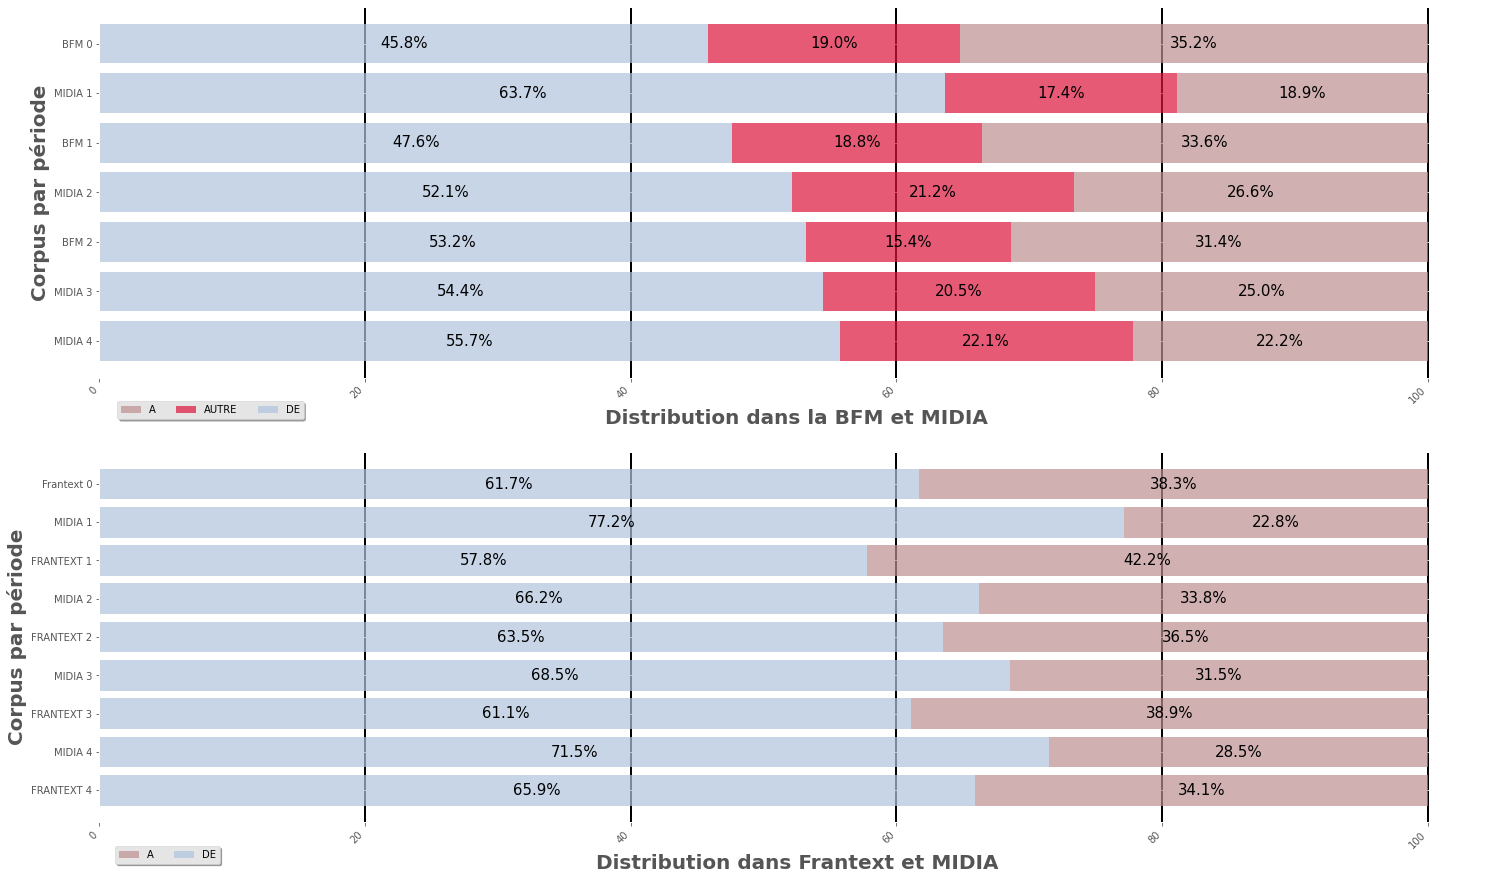

In [ ]:
#impot libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#main figure settings
plt.style.use('ggplot')
plt.figure(figsize=(5,15), dpi=(72))

plt.subplot(2,1,1)
#import the data
df = pd.read_excel("CLEANproporMIDIABFMaETdeETautre.xlsx")
 
#populate the variables from the xlsx dataframe
Corpus = df.Corpus
A = df.A
DE = df.DE
AUTRE = df.AUTRE

ind = [x for x, _ in enumerate(Corpus)]

#calculate percentages for the 100% stacked bars
total = A+DE+AUTRE
proportion_A = np.true_divide(A, total) * 100
proportion_DE = np.true_divide(DE, total) * 100
proportion_AUTRE = np.true_divide(AUTRE, total) * 100

plt.subplots_adjust(right=4)

#plot and modify the bars
plt.barh(ind, proportion_A, label='A', color='rosybrown', left=proportion_AUTRE+proportion_DE, alpha=0.7)
plt.barh(ind, proportion_AUTRE, label='AUTRE', color='crimson', left=proportion_DE, alpha=0.7)
plt.barh(ind, proportion_DE, label='DE', color='lightsteelblue', alpha=0.7)

#set and modify ticks, labels and legend
plt.yticks(ind, Corpus)
plt.ylabel("Corpus par période", fontsize=20, fontweight='bold')
plt.xlabel("Distribution dans la BFM et MIDIA", fontsize=20, fontweight='bold')
plt.xlim=1.0
plt.legend(fontsize=10, bbox_to_anchor=(0.15, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax=plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(color='black', linestyle='-', axis="x", linewidth=2)
ax.set_facecolor('white')
plt.tick_params(labelsize=10)

#round percentage to 0.00

cols=['DE','A', 'AUTRE']
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)
df[cols] = df[cols].round(2)

#show percentage on each bar

df_total = df["DE"] + df["A"] + df["AUTRE"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', fontsize=15)

df

plt.subplot(2,1,2)
#import the data
df1 = pd.read_excel("CorrectionEtiqCLEANproporMIDIAFRaETde.xlsx")
 
#populate the variables from the xlsx dataframe
Corpus = df1.Corpus
A = df1.A
DE = df1.DE

ind = [x for x, _ in enumerate(Corpus)]

#calculate percentages for the 100% stacked bars
total = A+DE
proportion_A = np.true_divide(A, total) * 100
proportion_DE = np.true_divide(DE, total) * 100

plt.subplots_adjust(right=4)

#plot and modify the bars
plt.barh(ind, proportion_A, label='A', color='rosybrown', left=proportion_DE, alpha=0.7)
plt.barh(ind, proportion_DE, label='DE', color='lightsteelblue', alpha=0.7)

#set and modify ticks, labels and legend
plt.yticks(ind, Corpus)
plt.ylabel("Corpus par période", fontsize=20, fontweight='bold')
plt.xlabel("Distribution dans Frantext et MIDIA", fontsize=20, fontweight='bold')
plt.xlim=1.0
plt.legend(fontsize=10, bbox_to_anchor=(0.09, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax=plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(color='black', linestyle='-', axis="x", linewidth=2)
ax.set_facecolor('white')
plt.tick_params(labelsize=10)

#round percentage to 0.00

cols=['DE','A']
df1[cols] = df1[cols].div(df1[cols].sum(axis=1), axis=0).multiply(100)
df1[cols] = df1[cols].round(2)

#show percentage on each bar

df1_total = df1["DE"] + df1["A"]
df1_rel = df1[df1.columns[1:]].div(df1_total, 0)*100
  
for n in df1_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df1_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', fontsize=15)

df
